In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt



In [6]:
#note:
#sth is strange with (2,0,'tot') and others vol from 1 Oct 00:00 to 7Oct 23:59

df_merged_volume = pd.read_csv("../data/preprocessed_input_interpolate_20min.csv")

In [12]:
df_merged_volume.head()
df_merged_volume['date'] = pd.to_datetime(df_merged_volume['date'])
df_merged_volume['date']

0      2016-09-20 00:00:00
1      2016-09-20 00:20:00
2      2016-09-20 00:40:00
3      2016-09-20 01:00:00
4      2016-09-20 01:20:00
5      2016-09-20 01:40:00
6      2016-09-20 02:00:00
7      2016-09-20 02:20:00
8      2016-09-20 02:40:00
9      2016-09-20 03:00:00
10     2016-09-20 03:20:00
11     2016-09-20 03:40:00
12     2016-09-20 04:00:00
13     2016-09-20 04:20:00
14     2016-09-20 04:40:00
15     2016-09-20 05:00:00
16     2016-09-20 05:20:00
17     2016-09-20 05:40:00
18     2016-09-20 06:00:00
19     2016-09-20 06:20:00
20     2016-09-20 06:40:00
21     2016-09-20 07:00:00
22     2016-09-20 07:20:00
23     2016-09-20 07:40:00
24     2016-09-20 08:00:00
25     2016-09-20 08:20:00
26     2016-09-20 08:40:00
27     2016-09-20 09:00:00
28     2016-09-20 09:20:00
29     2016-09-20 09:40:00
               ...        
1987   2016-10-17 14:20:00
1988   2016-10-17 14:40:00
1989   2016-10-17 15:00:00
1990   2016-10-17 15:20:00
1991   2016-10-17 15:40:00
1992   2016-10-17 16:00:00
1

In [13]:
df_merged_volume['timeofday'] = df_merged_volume.date.apply( lambda d : d.hour+d.minute/60.)

In [17]:
useful_cols = [
              #(1, 0, 'cargocar'),
              #(1, 0, 'etc'),
              #(1, 0, 'motorcycle'),
              #(1, 0, 'privatecar'),
               "(1, 0, 'tot')",
              #(1, 0, 'unknowncar'),
              #(1, 1, 'cargocar'),
              #(1, 1, 'etc'),
              #(1, 1, 'motorcycle'),
              #(1, 1, 'privatecar'),
               "(1, 1, 'tot')",
              #(1, 1, 'unknowncar'),
              #(2, 0, 'cargocar'),
              #(2, 0, 'etc'),
              #(2, 0, 'motorcycle'),
              #(2, 0, 'privatecar'),
               "(2, 0, 'tot')",
              #(2, 0, 'unknowncar'),
              #(3, 0, 'cargocar'),
              #(3, 0, 'etc'),
              #(3, 0, 'motorcycle'),
              #(3, 0, 'privatecar'),
               "(3, 0, 'tot')",
              #(3, 0, 'unknowncar'),
              #(3, 1, 'cargocar'),
              #(3, 1, 'etc'),
              #(3, 1, 'motorcycle'),
              #(3, 1, 'privatecar'),
               "(3, 1, 'tot')",
              #(3, 1, 'unknowncar'),
               "('A', 2)",
               "('A', 3)",
               "('B', 1)",
               "('B', 3)",
               "('C', 1)",
               "('C', 3)",
              #'date',
              #'hour',
              #'pressure',
              #'sea_pressure',
              #'wind_direction',
              #'wind_speed',
              #'temperature',
               'rel_humidity',
               'precipitation',
               'dayofweek',
               'is_holiday',
               'timeofday'
              ]

sel_rows = df_merged_volume[ lambda r : ((r.timeofday>= 6) & (r.timeofday<10)) |
		                        ((r.timeofday>=15) & (r.timeofday<19))
		           ]
df_merged_volume.columns

Index(['(1, 0, 'cargocar')', '(1, 0, 'etc')', '(1, 0, 'motorcycle')',
       '(1, 0, 'privatecar')', '(1, 0, 'tot')', '(1, 0, 'unknowncar')',
       '(1, 1, 'cargocar')', '(1, 1, 'etc')', '(1, 1, 'motorcycle')',
       '(1, 1, 'privatecar')', '(1, 1, 'tot')', '(1, 1, 'unknowncar')',
       '(2, 0, 'cargocar')', '(2, 0, 'etc')', '(2, 0, 'motorcycle')',
       '(2, 0, 'privatecar')', '(2, 0, 'tot')', '(2, 0, 'unknowncar')',
       '(3, 0, 'cargocar')', '(3, 0, 'etc')', '(3, 0, 'motorcycle')',
       '(3, 0, 'privatecar')', '(3, 0, 'tot')', '(3, 0, 'unknowncar')',
       '(3, 1, 'cargocar')', '(3, 1, 'etc')', '(3, 1, 'motorcycle')',
       '(3, 1, 'privatecar')', '(3, 1, 'tot')', '(3, 1, 'unknowncar')',
       '('A', 2)', '('A', 3)', '('B', 1)', '('B', 3)', '('C', 1)', '('C', 3)',
       'date', 'hour', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation',
       'dayofweek', 'is_holiday', 'timeofday'],
      dtype='object')

In [28]:
sel_rows = sel_rows[ useful_cols ]

In [29]:
sel_rows

,"(1, 0, 'tot')","(1, 1, 'tot')","(2, 0, 'tot')","(3, 0, 'tot')","(3, 1, 'tot')","('A', 2)","('A', 3)","('B', 1)","('B', 3)","('C', 1)","('C', 3)",rel_humidity,precipitation,dayofweek,is_holiday,timeofday
18,13.0,47.0,33.0,31.0,24.0,70.4825,99.305,169.500000,119.4650,166.5600,182.617037,43.000000,0.0,1,0,6.000000
19,20.0,59.0,31.0,43.0,43.0,93.1900,137.970,137.435000,107.8775,114.4800,184.500000,42.888889,0.0,1,0,6.333333
20,29.0,69.0,54.0,80.0,66.0,41.0900,105.305,105.370000,96.2900,112.2100,165.740000,42.777778,0.0,1,0,6.666667
21,38.0,88.0,79.0,113.0,83.0,71.1400,102.210,133.820000,95.2000,162.1900,146.980000,42.666667,0.0,1,0,7.000000
22,30.0,126.0,86.0,141.0,97.0,55.6600,136.340,96.920000,131.0750,154.7250,190.233333,42.555556,0.0,1,0,7.333333
23,31.0,139.0,93.0,136.0,122.0,56.3250,106.260,122.330000,80.6000,147.2600,233.486667,42.444444,0.0,1,0,7.666667
24,53.0,132.0,112.0,145.0,154.0,59.7200,121.380,147.740000,125.2500,139.3800,276.740000,42.333333,0.0,1,0,8.000000
25,50.0,151.0,111.0,173.0,209.0,49.5200,117.150,179.670000,99.5500,154.7600,222.400000,42.222222,0.0,1,0,8.333333
26,45.0,131.0,112.0,154.0,210.0,82.3100,120.410,164.115000,95.3700,174.9100,168.060000,42.111111,0.0,1,0,8.666667
27,51.0,150.0,105.0,144.0,191.0,67.6900,119.500,141.490000,140.1700,182.1250,113.720000,42.000000,0.0,1,0,9.000000


In [ ]:
#split to train and test set
train_rows = sel_rows[: -24*7]
test_rows = sel_rows[-24*7:] #reserve 1 week for test

#get numpy array from panda dataframe
train_arr = train_rows.values
test_arr = test_rows.values

#scale feature array to range -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_arr)
train_scaled_arr = scaler.transform(train_arr)
test_scaled_arr = scaler.transform(test_arr)

#sample subsequence from the time series
train_seqs = []
nSegments = train_arr.shape[0]//12 # each segment holds 4hr data (12 datapoints, 20min each)
for segment in range(nSegments):
    for t in range(6):
        startIdx = segment*12 + t
        train_seqs.append(train_scaled_arr[startIdx: startIdx+7])
train_seqs = np.stack(train_seqs)

test_seqs = []
nSegments = test_arr.shape[0]//12 # each segment holds 4hr data (12 datapoints, 20min each)
for segment in range(nSegments):
    for t in range(6):
        startIdx = segment*12 + t
        test_seqs.append(test_scaled_arr[startIdx: startIdx+7])
test_seqs = np.stack(test_seqs)

#keras
#https://keras.io/getting-started/sequential-model-guide/#examples
input_dim = len(useful_cols)
output_dim = len(useful_cols)
timesteps = 6 # use 6 timesteps to predict the 7th

x_train, y_train = train_seqs[:, 0:-1], train_seqs[:, -1]
x_test , y_test  =  test_seqs[:, 0:-1],  test_seqs[:, -1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 6, 160)            113280    
_________________________________________________________________
lstm_11 (LSTM)               (None, 160)               205440    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                2576      
Total params: 321,296
Trainable params: 321,296
Non-trainable params: 0
_________________________________________________________________
Train on 252 samples, validate on 84 samples
Epoch 1/500
252/252 [==============================] - 1s - loss: 0.3715 - val_loss: 0.2405
Epoch 2/500
252/252 [==============================] - 0s - loss: 0.1900 - val_loss: 0.1401
Epoch 3/500
252/252 [==============================] - 0s - loss: 0.1248 - val_loss: 0.1067
Epoch 4/500
252/252 [==============================] - 0s - loss: 0.0850 - val_

252/252 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0307
Epoch 81/500
252/252 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0314
Epoch 82/500
252/252 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0303
Epoch 83/500
252/252 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0314
Epoch 84/500
252/252 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0309
Epoch 85/500
252/252 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0313
Epoch 86/500
252/252 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0316
Epoch 87/500
252/252 [==============================] - 0s - loss: 0.0180 - val_loss: 0.0309
Epoch 88/500
252/252 [==============================] - 0s - loss: 0.0178 - val_loss: 0.0313
Epoch 89/500
252/252 [==============================] - 0s - loss: 0.0178 - val_loss: 0.0319
Epoch 90/500
252/252 [==============================] - 0s - loss: 0.0175 - val_los

252/252 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0413
Epoch 168/500
252/252 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0444
Epoch 169/500
252/252 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0453
Epoch 170/500
252/252 [==============================] - 0s - loss: 0.0116 - val_loss: 0.0427
Epoch 171/500
252/252 [==============================] - 0s - loss: 0.0116 - val_loss: 0.0486
Epoch 172/500
252/252 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0428
Epoch 173/500
252/252 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0485
Epoch 174/500
252/252 [==============================] - 0s - loss: 0.0109 - val_loss: 0.0434
Epoch 175/500
252/252 [==============================] - 0s - loss: 0.0106 - val_loss: 0.0466
Epoch 176/500
252/252 [==============================] - 0s - loss: 0.0108 - val_loss: 0.0454
Epoch 177/500
252/252 [==============================] - 0s - loss: 0.0107

252/252 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0605
Epoch 255/500
252/252 [==============================] - 0s - loss: 0.0063 - val_loss: 0.0632
Epoch 256/500
252/252 [==============================] - 0s - loss: 0.0063 - val_loss: 0.0590
Epoch 257/500
252/252 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0616
Epoch 258/500
252/252 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0582
Epoch 259/500
252/252 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0620
Epoch 260/500
252/252 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0587
Epoch 261/500
252/252 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0618
Epoch 262/500
252/252 [==============================] - 0s - loss: 0.0058 - val_loss: 0.0616
Epoch 263/500
252/252 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0614
Epoch 264/500
252/252 [==============================] - 0s - loss: 0.0055

252/252 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0692
Epoch 342/500
252/252 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0722
Epoch 343/500
252/252 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0684
Epoch 344/500
252/252 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0696
Epoch 345/500
252/252 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0714
Epoch 346/500
252/252 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0683
Epoch 347/500
252/252 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0714
Epoch 348/500
252/252 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0675
Epoch 349/500
252/252 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0724
Epoch 350/500
252/252 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0686
Epoch 351/500
252/252 [==============================] - 0s - loss: 0.0026

252/252 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0705
Epoch 429/500
252/252 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0707
Epoch 430/500
252/252 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0702
Epoch 431/500
252/252 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0712
Epoch 432/500
252/252 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0697
Epoch 433/500
252/252 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0708
Epoch 434/500
252/252 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0711
Epoch 435/500
252/252 [==============================] - 0s - loss: 9.8697e-04 - val_loss: 0.0709
Epoch 436/500
252/252 [==============================] - 0s - loss: 9.4689e-04 - val_loss: 0.0711
Epoch 437/500
252/252 [==============================] - 0s - loss: 9.3707e-04 - val_loss: 0.0707
Epoch 438/500
252/252 [==============================] - 0s - 

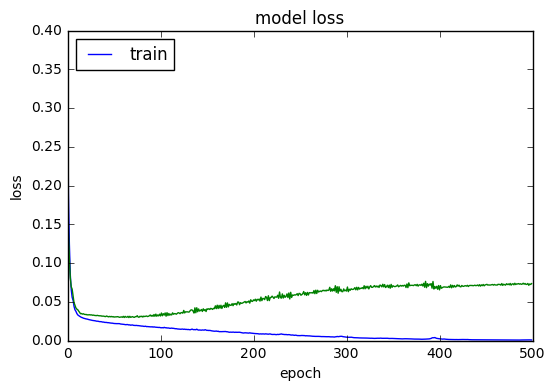

In [27]:
model = Sequential()
model.add(LSTM(160, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(LSTM(160))
model.add(Dense(output_dim))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history_w_model = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test,y_test))

plt.plot(history_w_model.history['loss'], label='loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history_w_model.history['val_loss'], label='Val_loss')
plt.show()